Импортируем модули.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from scipy import stats

Импортируем датасеты (X_bp.xlsx, X_nup.xlsx) и объединяем используя INNER.

In [2]:
df_x_bp = pd.read_excel('../data/raw/X_bp.xlsx', sheet_name='X_bp.csv')
df_x_nup = pd.read_excel('../data/raw/X_nup.xlsx', sheet_name='X_nup.csv')
df_bp_nup = df_x_bp.merge(df_x_nup, left_index=True, right_index=True, how='inner')

Удаляем лишние колонки - индексы датасетов

In [3]:
df_bp_nup.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

### Получаем информацию по датасетам:

Смотрим данные в исходных датасетах.

In [4]:
df_bp_nup.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0  
1                    220.0                 0.0          4.0               60.0  
2                    220.0                 0.0          4.0               70.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0

In [5]:
df_bp_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

По результату видим, что по параметрам датасета нет нулевых данных (Non-Null Count), поэтому проверку:
1. на isnull().sum() не проводим.

### Проводим одномерный анализ датасетов, функцией describe().

In [6]:
df_bp_nup.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [7]:
df_bp_nup.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Т.к. решаем задачу регрессии не будем использовать LabelEncoder для преобразования 'Угол нашивки, град'.

### Проводим одномерный анализ объединенного датасета, графическим способом.

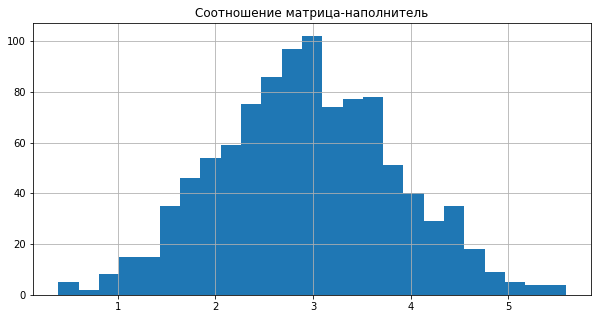

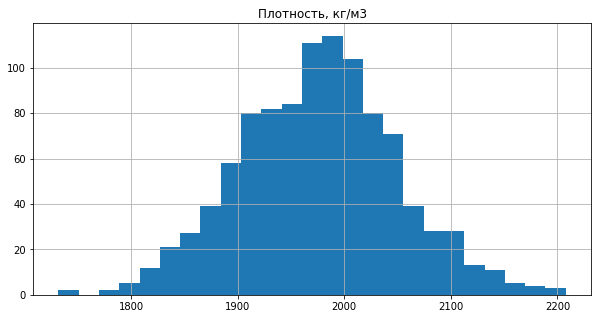

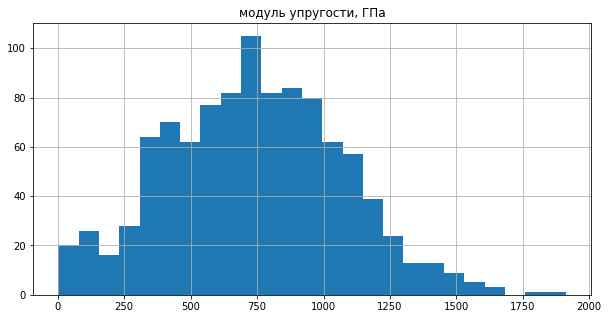

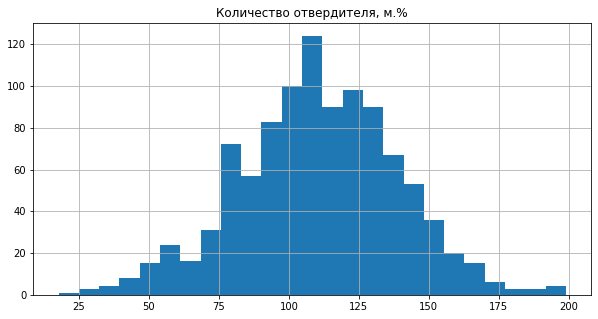

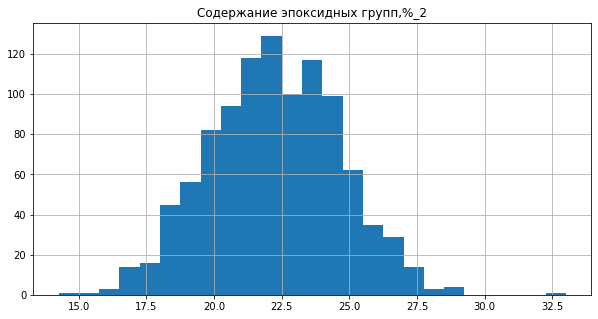

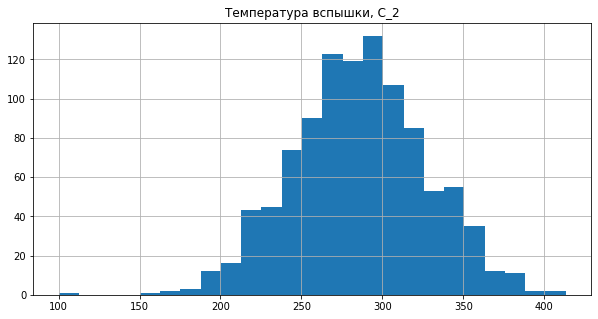

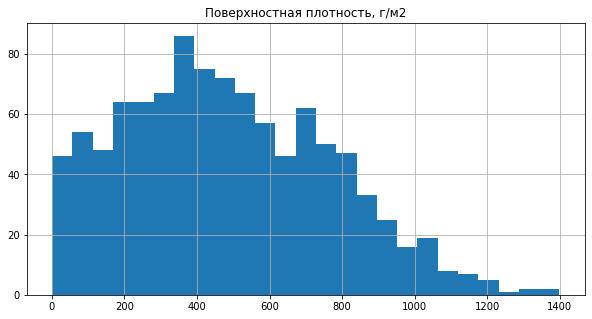

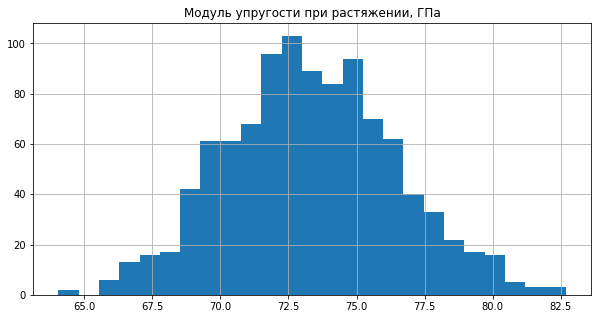

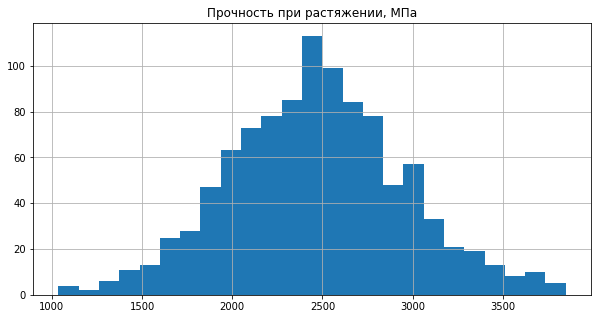

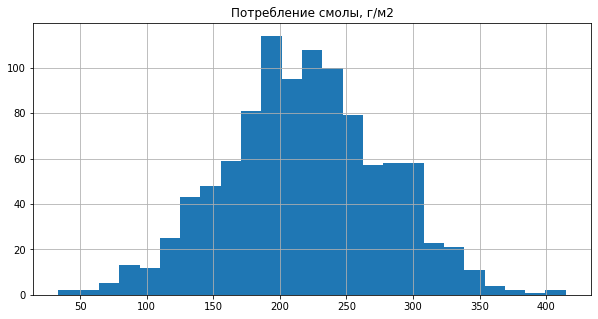

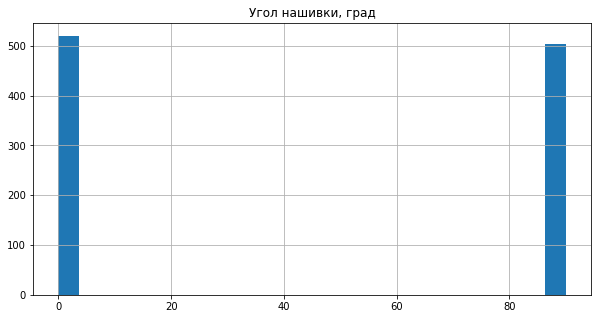

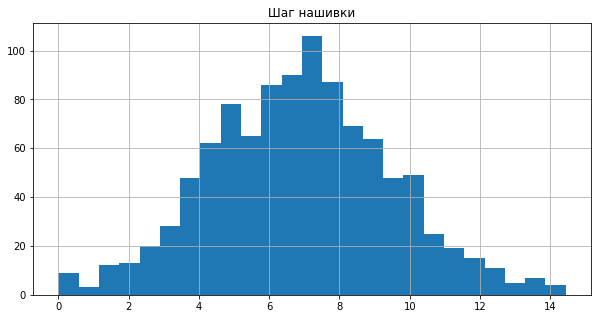

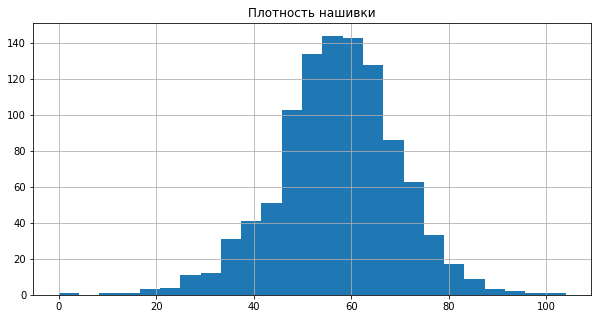

In [8]:
# Выводим распределение по всем столбцам
for column in df_bp_nup:
    plt.figure(column, figsize = (10, 5))
    plt.title(column)
    df_bp_nup[column].hist(bins=25)
    plt.show()

In [9]:
shapiro_test = stats.shapiro(df_bp_nup['Поверхностная плотность, г/м2'])
shapiro_test

ShapiroResult(statistic=0.9775959849357605, pvalue=1.848812249127807e-11)

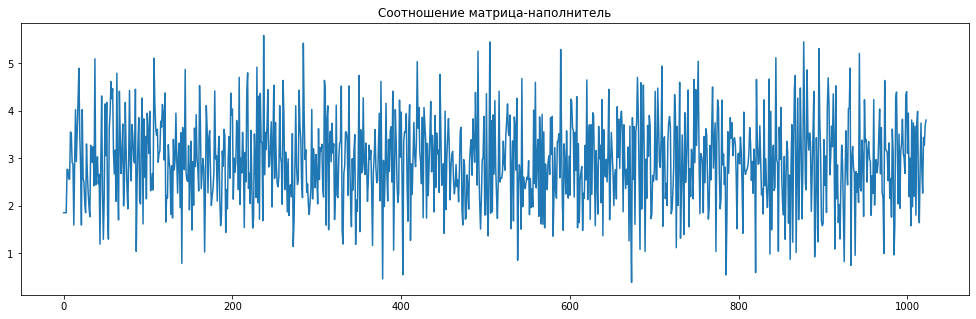

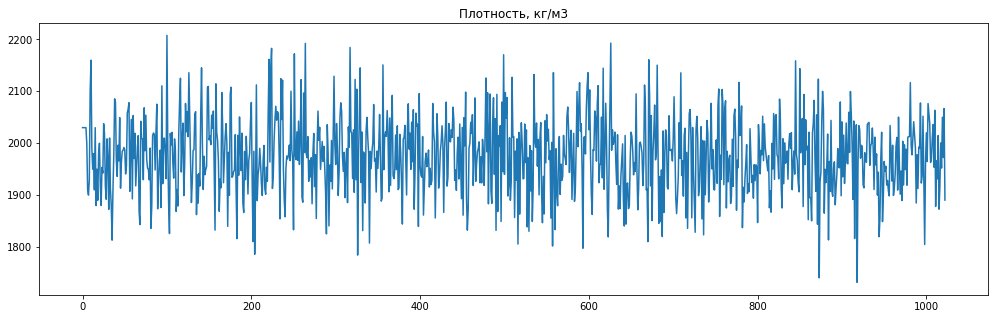

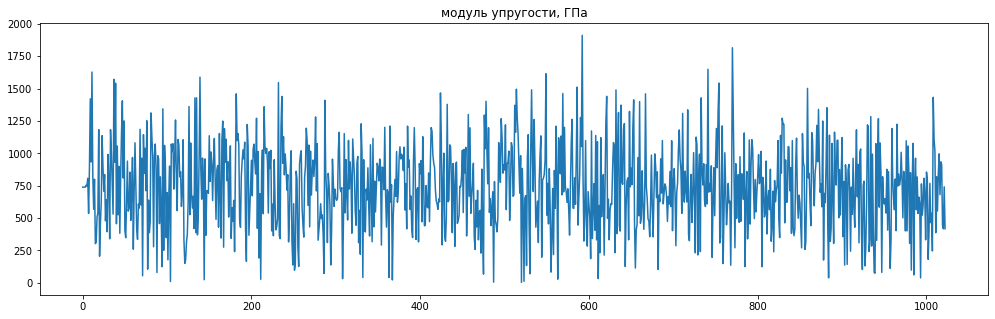

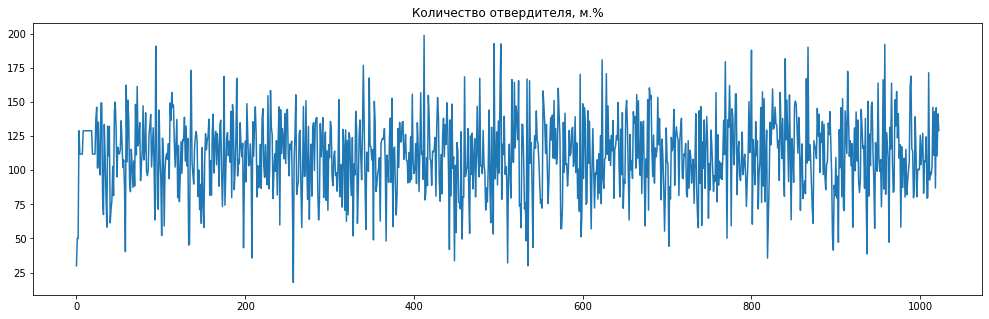

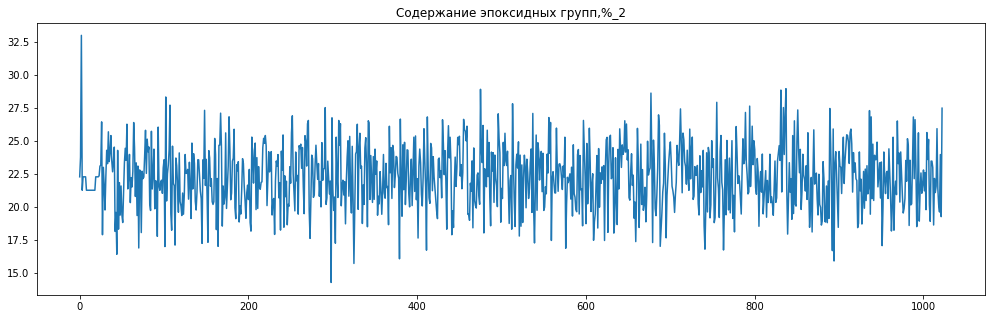

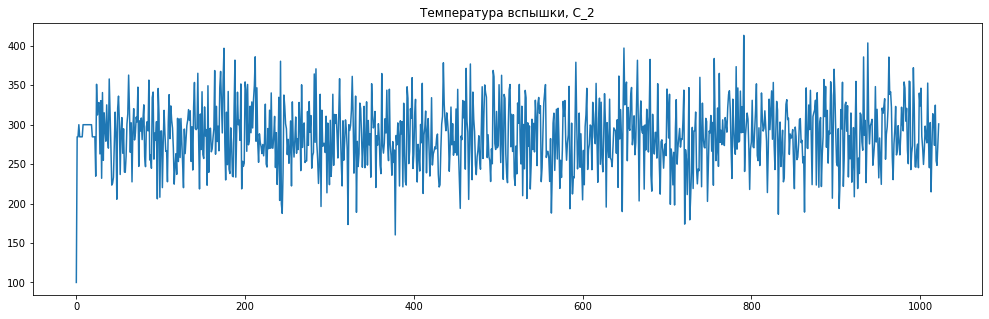

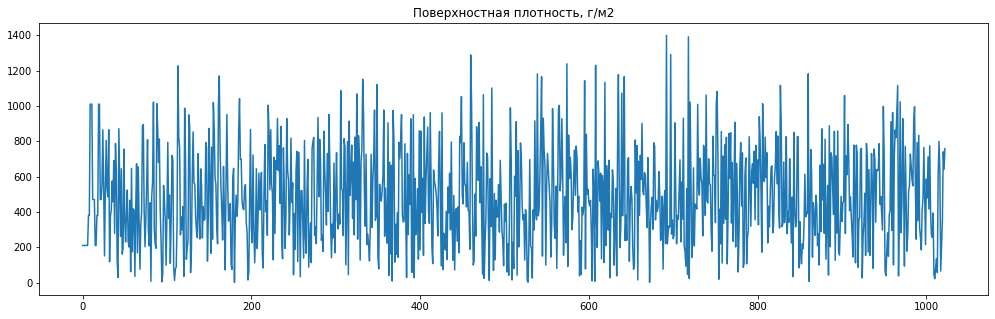

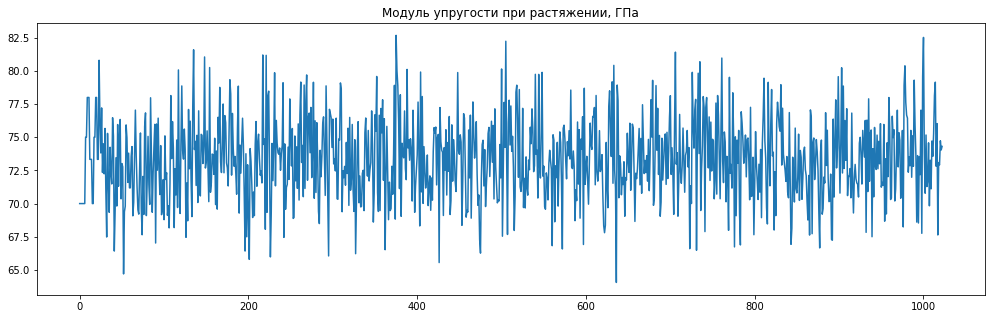

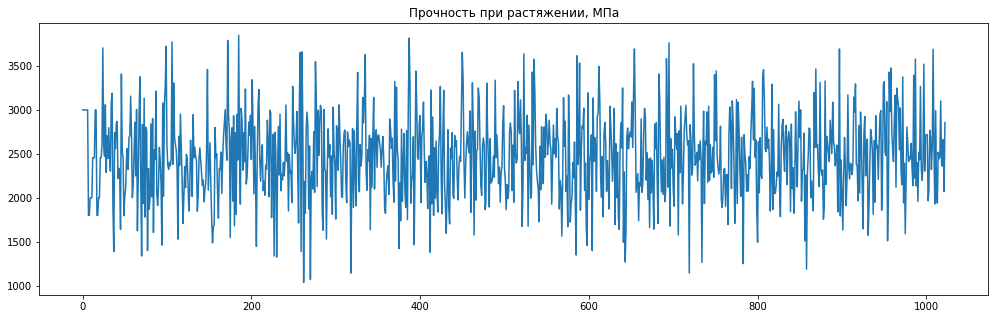

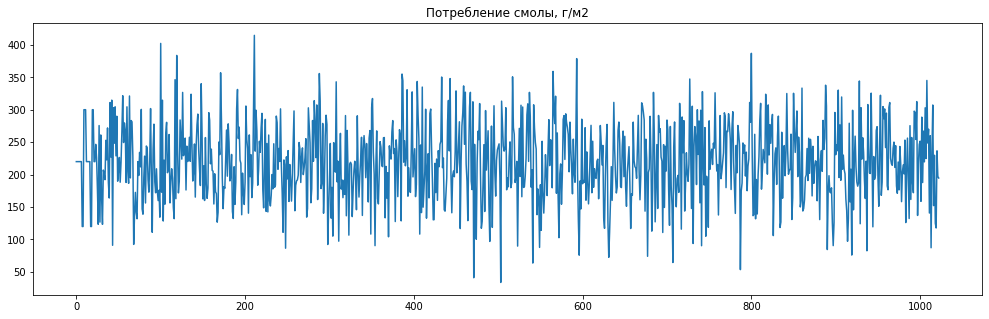

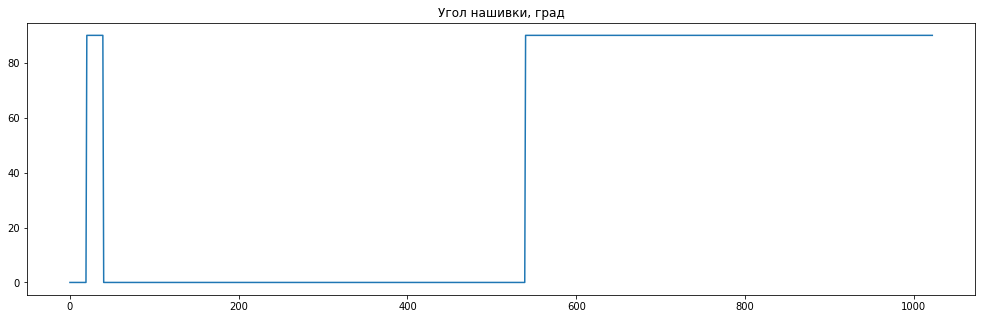

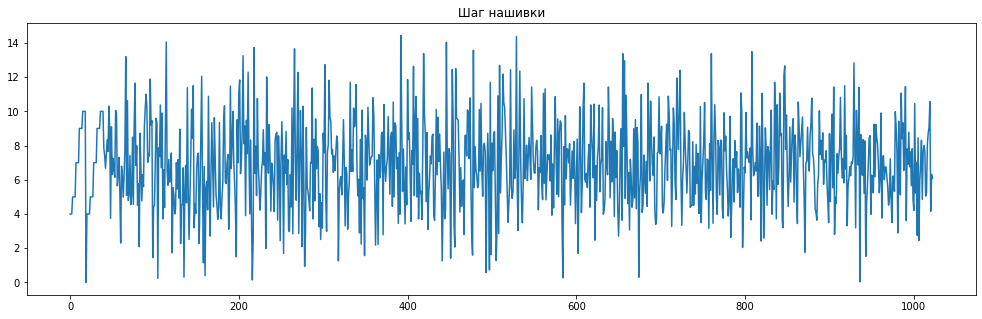

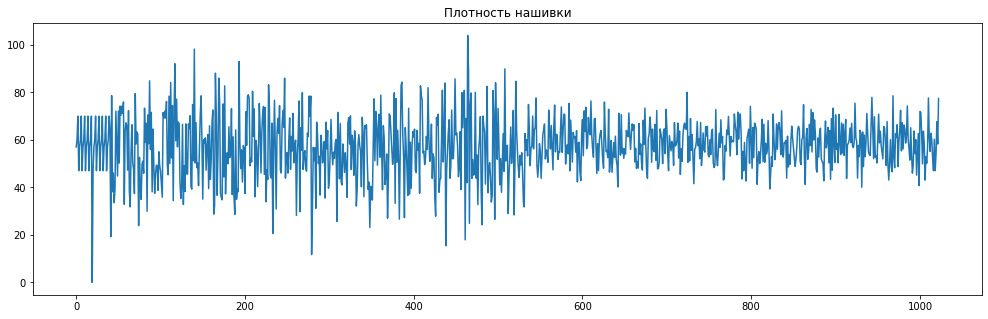

In [10]:
# Выводим тренд по всем столбцам
for column in df_bp_nup:
    plt.figure(column, figsize = (17, 5))
    plt.title(column)
    df_bp_nup[column].plot.line()

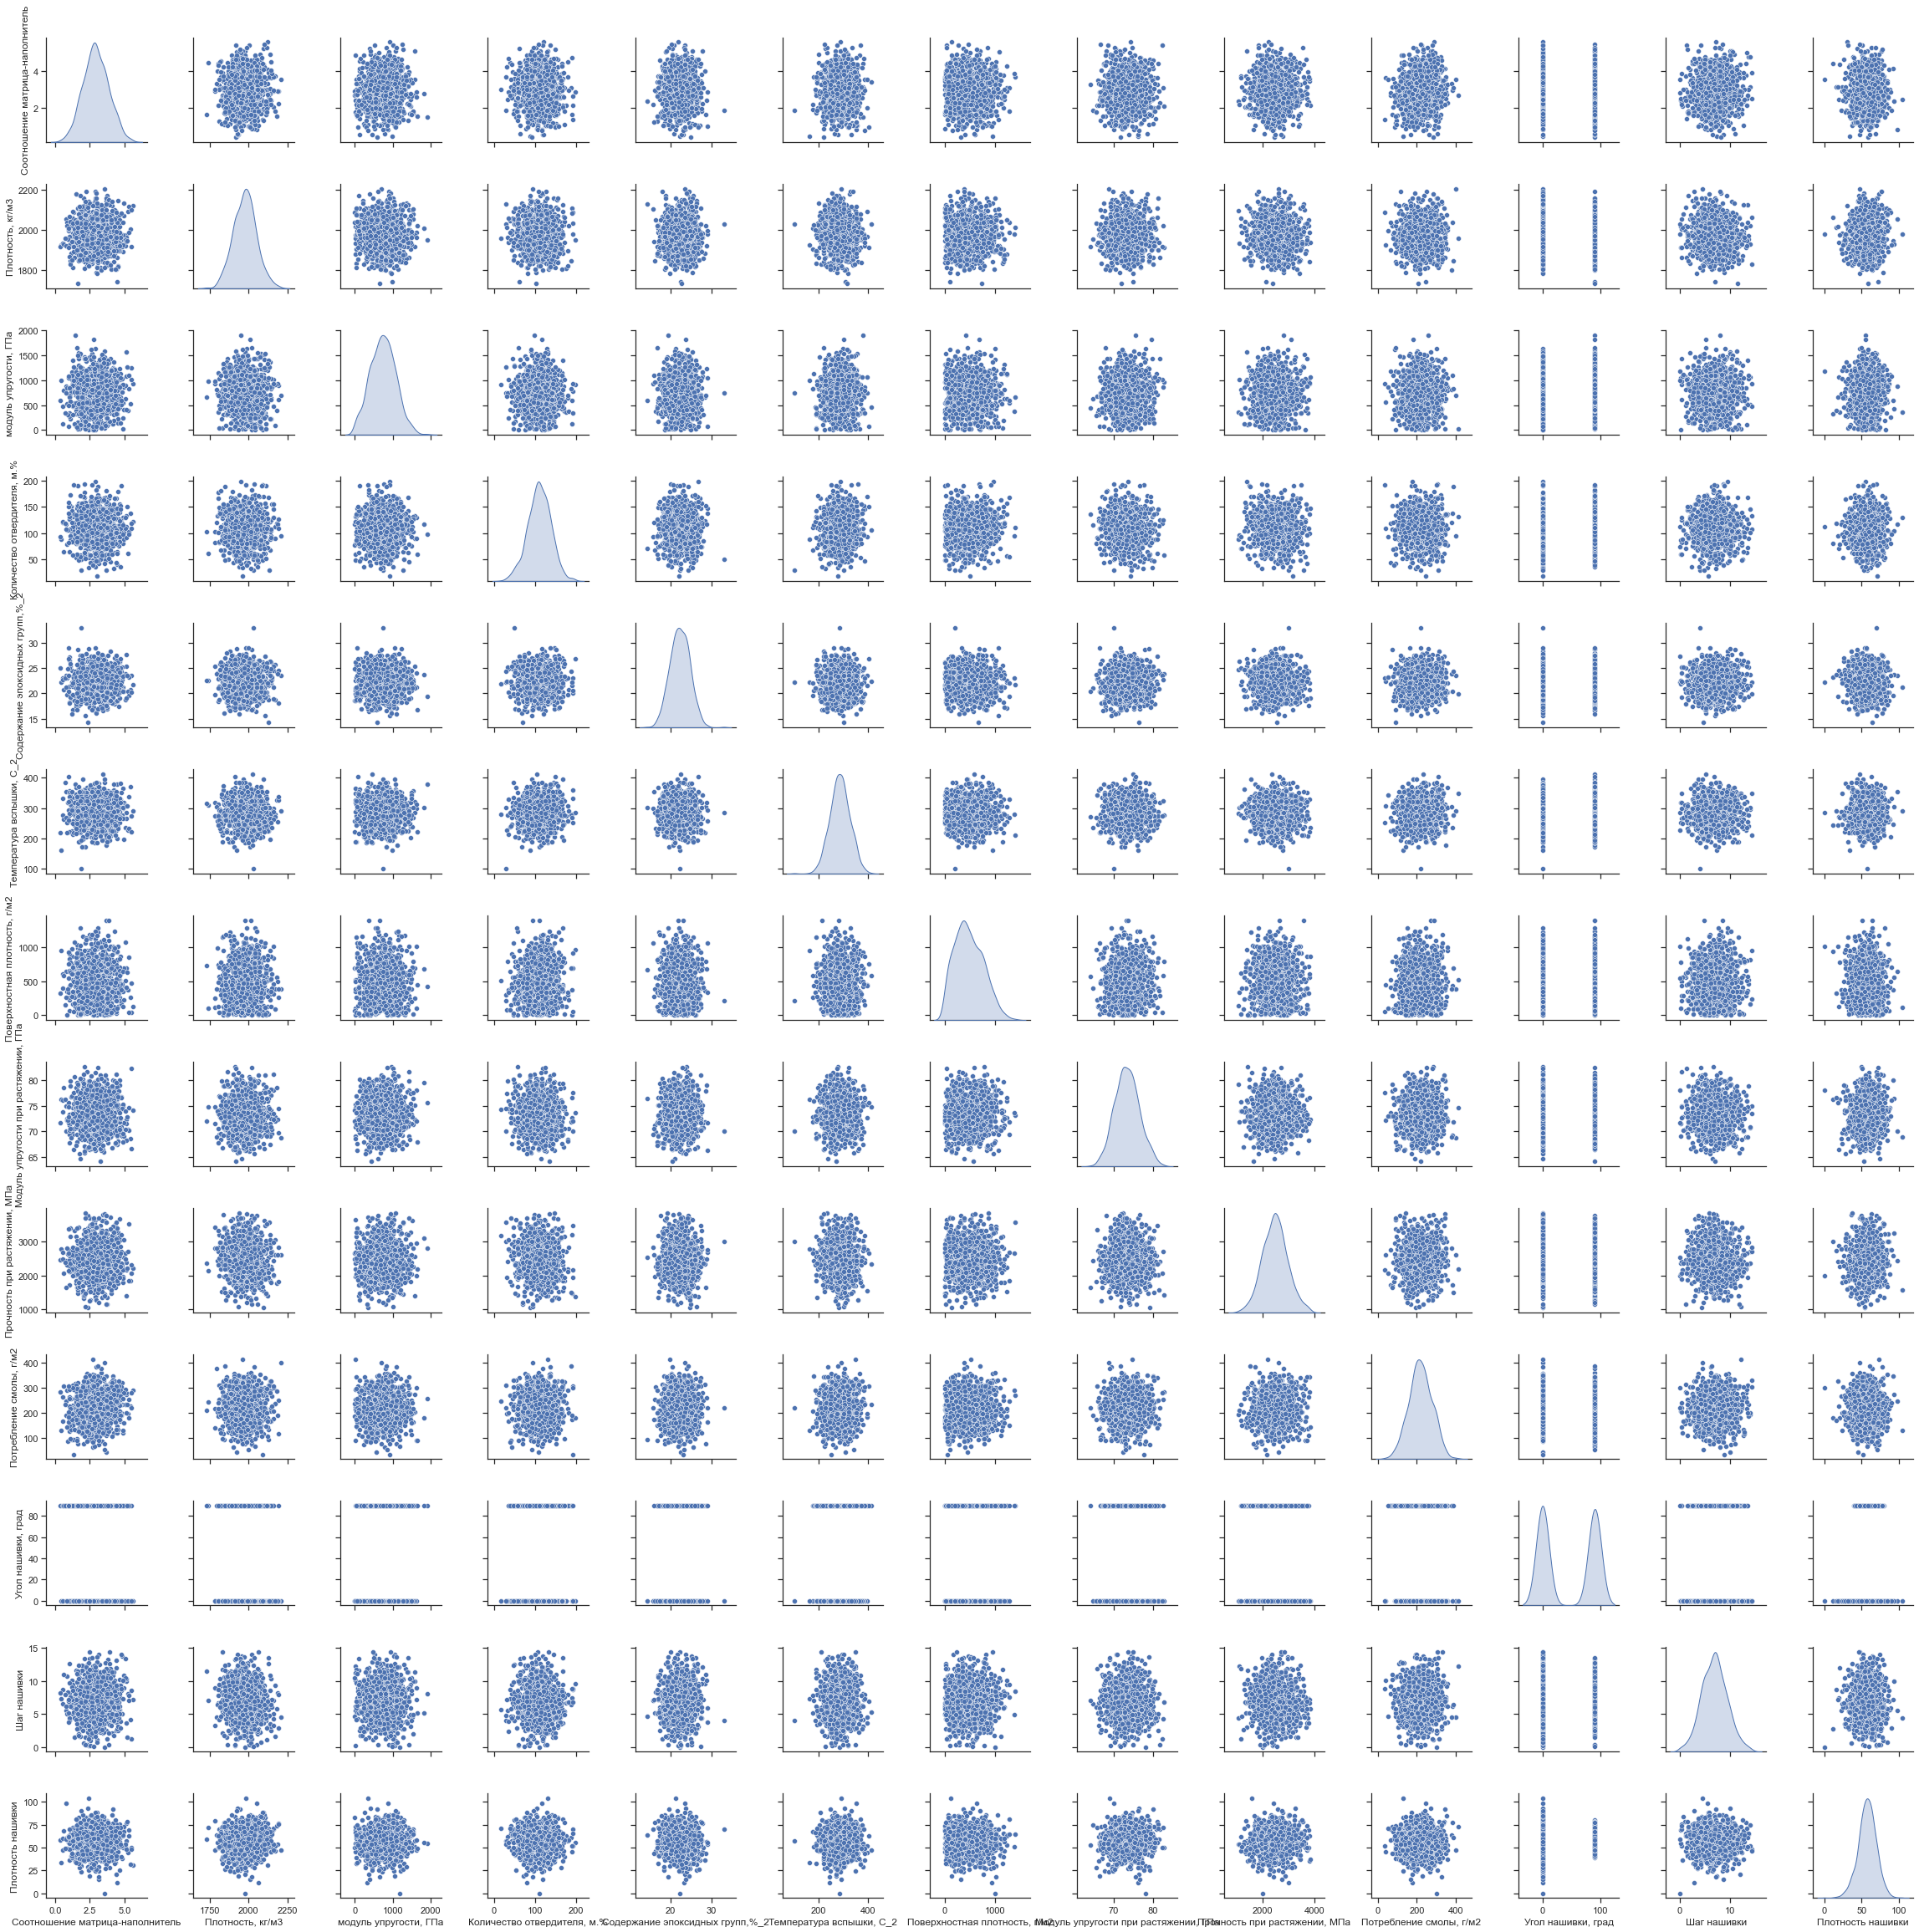

In [11]:
# Выводим матрицу рассеивания
sns.set_theme(style="ticks")
sns.pairplot(df_bp_nup, diag_kind='kde', height=2.5) #hue = 'index' plot_kws={'alpha': 0.2}

<AxesSubplot:>

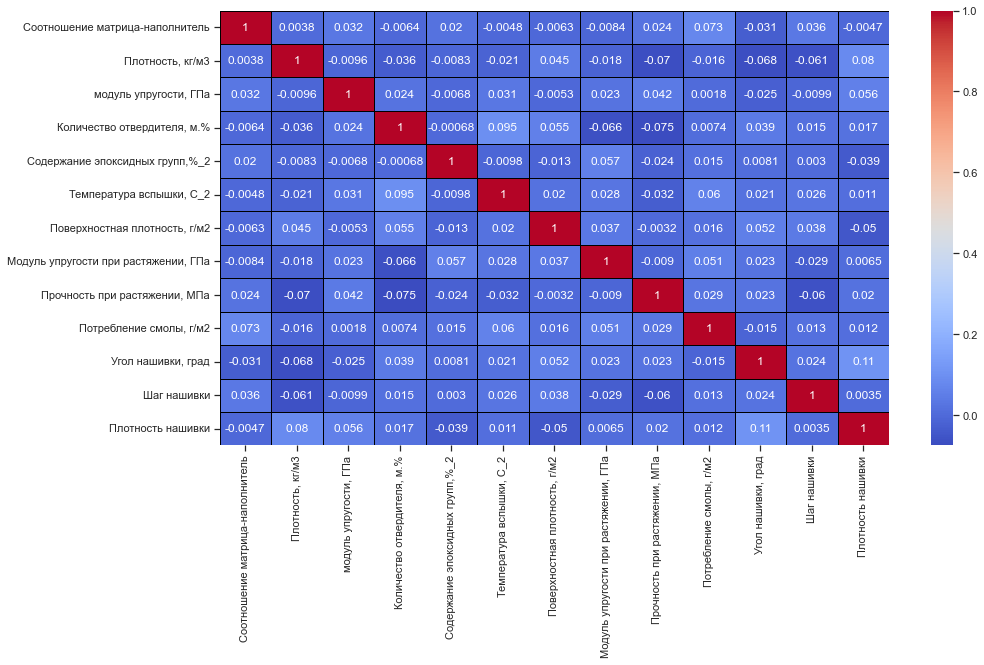

In [12]:
# Вывод матрицы корреляции
plt.figure(figsize = (15, 8))
sns.heatmap(df_bp_nup.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

In [13]:
std_scaler = preprocessing.StandardScaler().fit(df_bp_nup)
np_std_scaler = std_scaler.transform(df_bp_nup)
df_std_scaler = pd.DataFrame(np_std_scaler, columns = list(df_bp_nup.columns))

<AxesSubplot:>

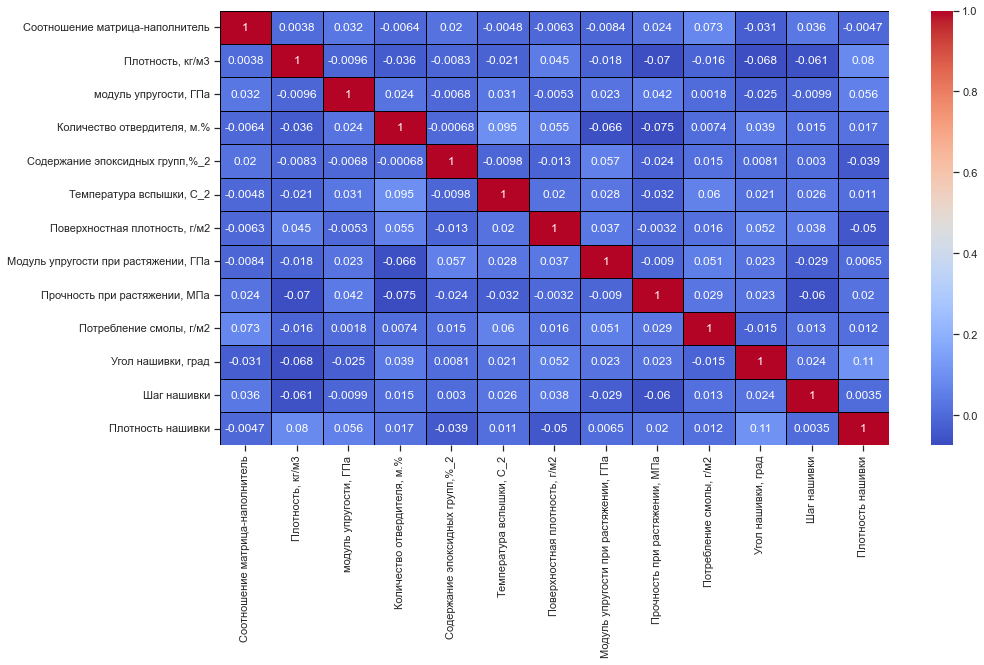

In [14]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_std_scaler.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

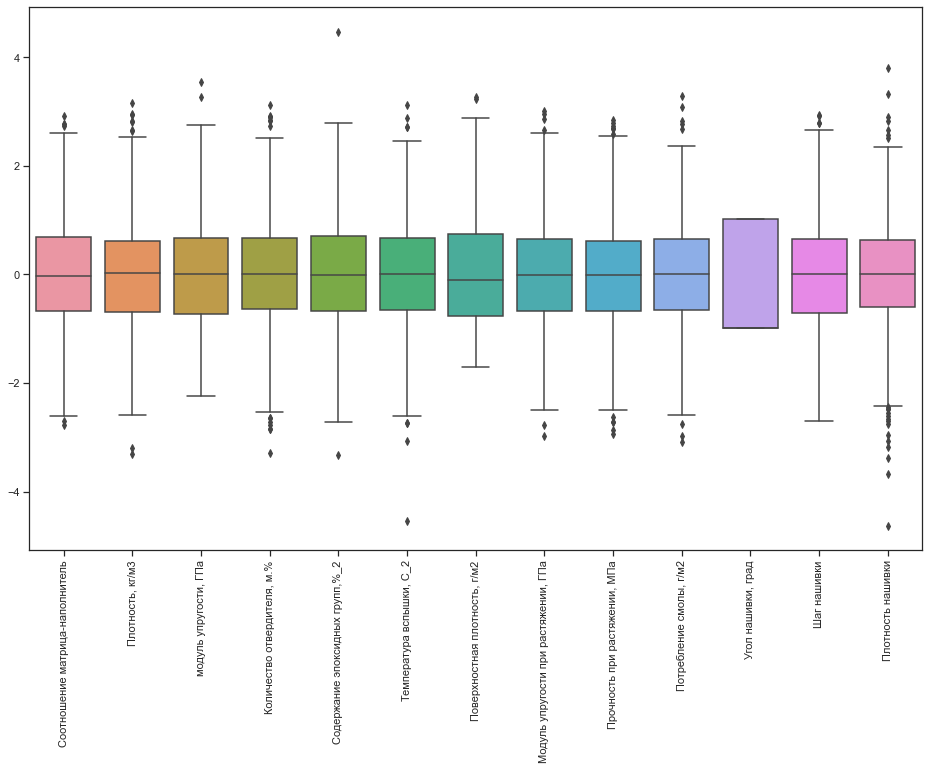

In [15]:
plt.figure(figsize=(16,10))
box_1 = sns.boxplot(data=df_std_scaler)
box_1 = box_1.set_xticklabels(box_1.get_xticklabels(),rotation=90)

In [16]:
pickle.dump(std_scaler, open('EDA_out_v00.pkl','wb'))

Код для обратного преобразования:\n
std_scalerr = pickle.load(open('scaler.pkl','rb'))\n
inversed = std_scaler.inverse_transform(np_std_scaler)\n
test = df_std_scaler['Плотность, кг/м3'].iloc[1] * std_scaler.scale_[1] + std_scaler.mean_[1]

In [17]:
for col in df_bp_nup.columns:
    df_std_scaler[df_std_scaler[col] > 3] = np.nan
    df_std_scaler[df_std_scaler[col] < -3] = np.nan
    df_std_scaler.dropna(inplace=True)
    df_std_scaler.reset_index(drop=True, inplace=True)

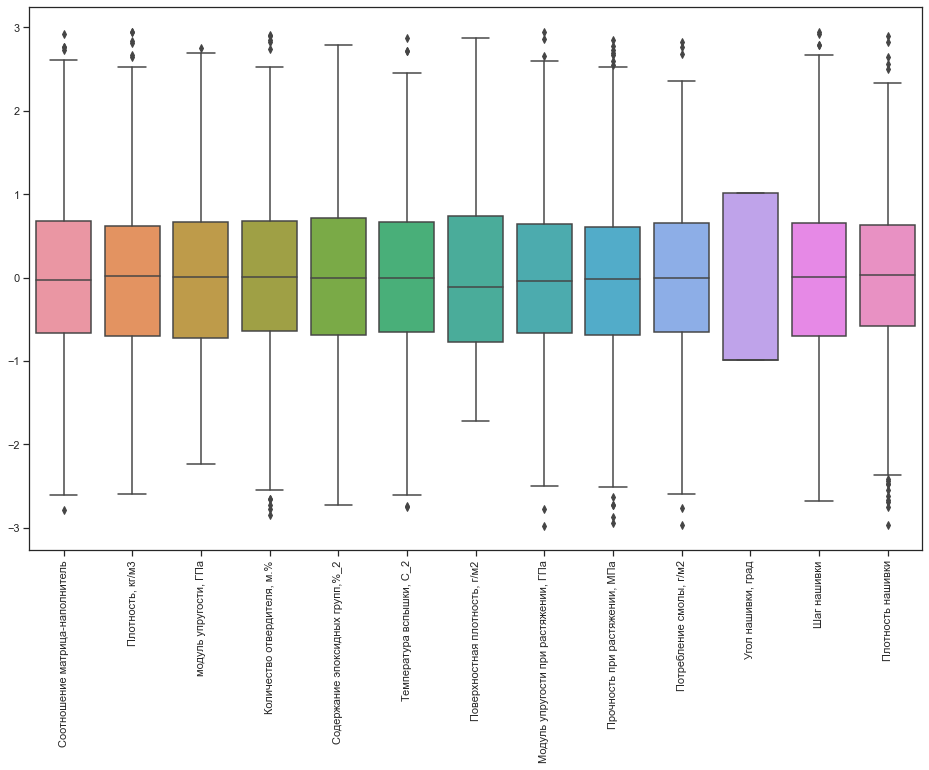

In [18]:
plt.figure(figsize=(16,10))
box_2 = sns.boxplot(data=df_std_scaler)
box_2 = box_2.set_xticklabels(box_2.get_xticklabels(),rotation=90)

<AxesSubplot:>

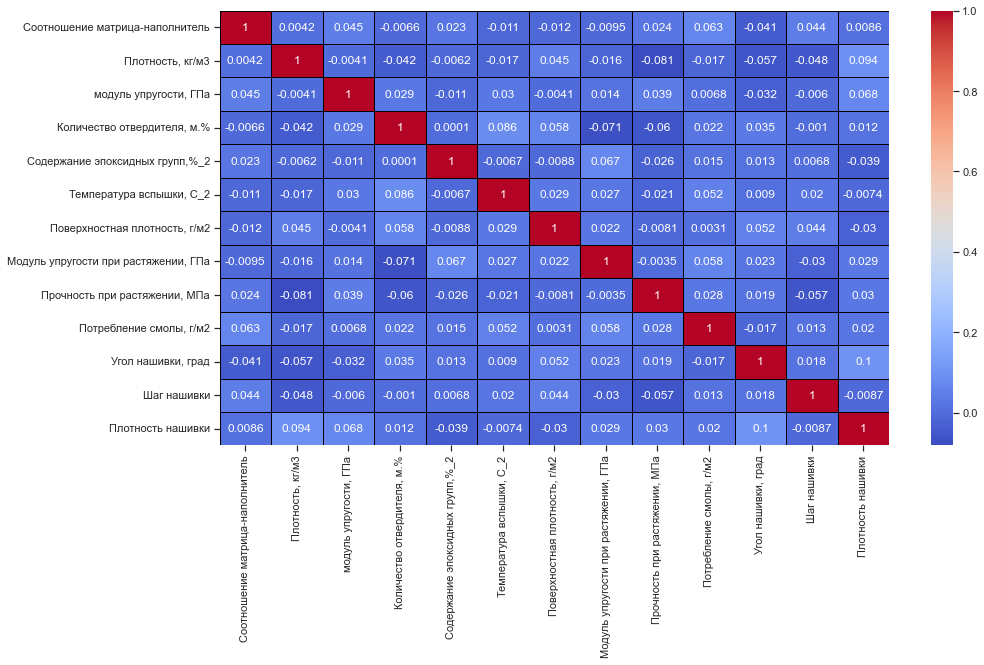

In [19]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_std_scaler.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

In [20]:
df_std_scaler.to_csv('../data/processed/EDA_out_v00.csv', index=False)